![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

# Laboratorio: 
## Introducción a _Data Science_:  Procesamiento del Lenguaje Natural con Python
   
<!--<center>
    <img src='images/GAN.jpeg'style="width: 600px;">
</center>-->

**Profesor**: Juan Bekios Calfa

**Carreras**: ICCI, IECI e IenCI

<!--<sub><sup>Tutorial: GANS. Sensio Artificial Intelligence [link](https://sensioai.com/blog/051_gans)</sup></sub> -->



---
**Nombre del alumno**: --Indicar nombre completo--

**Carrera**: -- Indicar carrera --

---

# 1. Introducción

El laboratorio tiene como objetivo conocer algunas técnicas para pre-procesar texto para ser utilizado como entrada a un clasificador o regresor.

Se estudiarán diferentes librerías que permiten preparar el texto para luego codificarlo en una estructura de datos manejable.

Primero importamos las librerías que vamos a utilizar para cargar los experimentos:

*  Textacy: Permite descargar fácilmente un corpus desde Wikipedia, además de otros corpus.

In [1]:
!pip install spacy
!pip install textacy
!python -m spacy download en_core_web_lg
# Importando las librerías que vamos a utilizar
import textacy
from textacy.datasets import Wikipedia
import warnings; warnings.simplefilter('ignore')

     |████████████████████████████████| 204kB 16.8MB/s 
     |████████████████████████████████| 12.8MB 42.9MB/s 
     |████████████████████████████████| 481kB 42.3MB/s 
     |████████████████████████████████| 92kB 11.3MB/s 
     |████████████████████████████████| 1.9MB 40.1MB/s 
     |████████████████████████████████| 1.1MB 34.2MB/s 
     |████████████████████████████████| 9.1MB 31.6MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 460kB 43.0MB/s 
     |████████████████████████████████| 122kB 36.2MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp37-cp37m-linux_x86_64.whl size=1223257 sha256=c0862e60bac1637055d0bd021c6cba12ec9be302bf21abfc53abae2a83f52b9d
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=d73bceb1a15c7ab4d9f5ec679ee9954aef8d4c722fccadd0d3e611bb70d57a48
  Stored 

## 1.1 Descargando corpus de Wikipedia

In [2]:
wp = Wikipedia(lang='es', version="current")
#wp = Wikipedia(lang='es')

# Cargue corpus
wp.download()

100%|██████████| 7.10G/7.10G [06:24<00:00, 18.5MB/s]


## 1.2 Información del corpus

In [3]:
wp.info

{'description': 'All pages for a given language- and version-specific Wikipedia site snapshot.',
 'name': 'wikipedia',
 'site_url': 'https://en.wikipedia.org/wiki/Main_Page'}

## 1.3 Mostrar el corpus

In [4]:
for text in wp.texts(min_len=1000, limit=2):
    print(text[:375], "\n")
    print('Número de caracteres: ', len(text))

Alimento hidrolizado es un alimento procesado de tal forma que alguna de las moléculas que lo componen se han sub-dividido (hidrolizado).[1]​ El procesado puede ser de origen biológico, en el que se emplea la acción digestiva de bacterias (fermentación), o de origen bioquímico mediante procesos enzimáticos, o simplemente químico mediante aplicación directa de ácidos o alca 

Número de caracteres:  3656
Los 100 discos que debes de tener antes del fin del mundo es una colección de discos creada y presentada en 2012 por Acosta Nesto y la compañía disquera Sony Music Entertainment México y su rama 'Sony Music Strategic Marketing', en la cual se compilan los 100 discos más representativos de Sony Music hasta el 2012.[1]​

Años atrás, se habían publicado dos discos llamados Lo 

Número de caracteres:  5764


## 1.4 Recuperar una linea

In [5]:
# Convertir el interador a una lista
lineas = list(wp.texts(min_len=1000, limit=2))

print(lineas)

['Alimento hidrolizado es un alimento procesado de tal forma que alguna de las moléculas que lo componen se han sub-dividido (hidrolizado).[1]\u200b El procesado puede ser de origen biológico, en el que se emplea la acción digestiva de bacterias (fermentación), o de origen bioquímico mediante procesos enzimáticos, o simplemente químico mediante aplicación directa de ácidos o alcalís. La hidrólisis en los alimentos es una forma de potenciar el sabor, y de presentar alimentos de cocinado instantáneo, y es por esta razón por la que se emplea frecuentemente en la industria alimentaria.[2]\u200b En algunos casos se hidrolizan alimentos con el objeto de extraer moléculas que afectan a la intolerancia existente a ciertos componentes, por regla general proteínas. La hidrolización se emplea igualmente en el procesado de alimentos para los animales con el objeto de incrementar las propiedades digestivas de ciertos procesados alimenticios.[3]\u200b\n\nLa hidrólisis en los alimentos ataca fundamen

## 1.5 Visualización de palabras (TF)

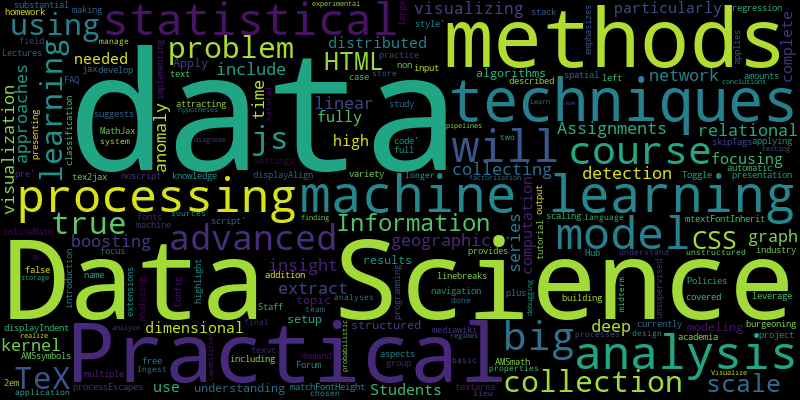

In [6]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("http://www.datasciencecourse.org")
root = BeautifulSoup(response.content, "lxml")

from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", root.text))
wc.to_image()

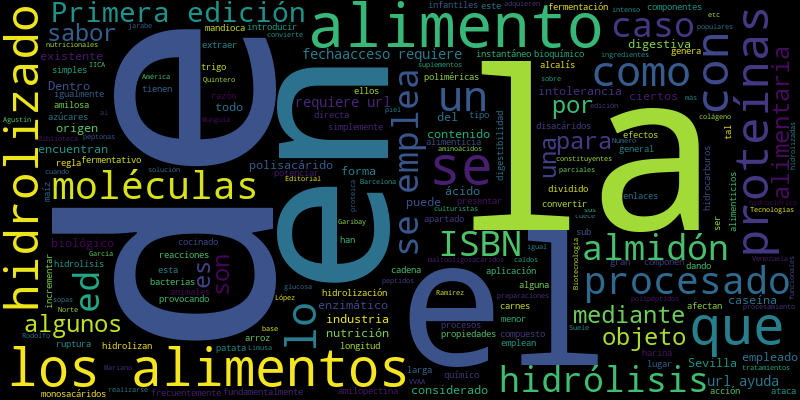

In [7]:
# Corpus Wikipedia

wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", lineas[0]))
wc.to_image()

# NLTK

## Instalar librerías

In [8]:
import nltk
nltk.download('popular')

# Obtener TOKENs del texto
tokens = nltk.word_tokenize(lineas[0])
print(tokens)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

## Algunos comandos

### Eliminar signos de puntuación en el texto

In [9]:
# Eliminar espacios 
nueva_linea = re.sub(r"\s+"," ", lineas[0])
tokens = nltk.word_tokenize(nueva_linea)
print(tokens)

['Alimento', 'hidrolizado', 'es', 'un', 'alimento', 'procesado', 'de', 'tal', 'forma', 'que', 'alguna', 'de', 'las', 'moléculas', 'que', 'lo', 'componen', 'se', 'han', 'sub-dividido', '(', 'hidrolizado', ')', '.', '[', '1', ']', '\u200b', 'El', 'procesado', 'puede', 'ser', 'de', 'origen', 'biológico', ',', 'en', 'el', 'que', 'se', 'emplea', 'la', 'acción', 'digestiva', 'de', 'bacterias', '(', 'fermentación', ')', ',', 'o', 'de', 'origen', 'bioquímico', 'mediante', 'procesos', 'enzimáticos', ',', 'o', 'simplemente', 'químico', 'mediante', 'aplicación', 'directa', 'de', 'ácidos', 'o', 'alcalís', '.', 'La', 'hidrólisis', 'en', 'los', 'alimentos', 'es', 'una', 'forma', 'de', 'potenciar', 'el', 'sabor', ',', 'y', 'de', 'presentar', 'alimentos', 'de', 'cocinado', 'instantáneo', ',', 'y', 'es', 'por', 'esta', 'razón', 'por', 'la', 'que', 'se', 'emplea', 'frecuentemente', 'en', 'la', 'industria', 'alimentaria', '.', '[', '2', ']', '\u200b', 'En', 'algunos', 'casos', 'se', 'hidrolizan', 'alimen

In [11]:
from nltk.corpus import stopwords

# Palabras innecesarias
sw = stopwords.words('spanish')

filtered_sentence = []
for w in tokens: 
    if w not in sw: 
        filtered_sentence.append(w)

print(filtered_sentence)

['Alimento', 'hidrolizado', 'alimento', 'procesado', 'tal', 'forma', 'alguna', 'moléculas', 'componen', 'sub-dividido', '(', 'hidrolizado', ')', '.', '[', '1', ']', '\u200b', 'El', 'procesado', 'puede', 'ser', 'origen', 'biológico', ',', 'emplea', 'acción', 'digestiva', 'bacterias', '(', 'fermentación', ')', ',', 'origen', 'bioquímico', 'mediante', 'procesos', 'enzimáticos', ',', 'simplemente', 'químico', 'mediante', 'aplicación', 'directa', 'ácidos', 'alcalís', '.', 'La', 'hidrólisis', 'alimentos', 'forma', 'potenciar', 'sabor', ',', 'presentar', 'alimentos', 'cocinado', 'instantáneo', ',', 'razón', 'emplea', 'frecuentemente', 'industria', 'alimentaria', '.', '[', '2', ']', '\u200b', 'En', 'casos', 'hidrolizan', 'alimentos', 'objeto', 'extraer', 'moléculas', 'afectan', 'intolerancia', 'existente', 'ciertos', 'componentes', ',', 'regla', 'general', 'proteínas', '.', 'La', 'hidrolización', 'emplea', 'igualmente', 'procesado', 'alimentos', 'animales', 'objeto', 'incrementar', 'propiedade

### Configurar el corpus a español y crearlo

In [12]:
# Librerías sklearn - Machine Learning
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

sw = stopwords.words('spanish')
print(sw)

documentA = lineas[0]
print(documentA)
documentB = lineas[1]
print(documentB)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## Obtener los vectores de frecuencia (TF) 

---



In [13]:
from sklearn.feature_extraction.text import CountVectorizer

sw = stopwords.words('spanish')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw)

freq_matrix = vectorizer.fit_transform([documentA, documentB])
#print(freq_matrix)

feature_names = vectorizer.get_feature_names()
dense_frec = freq_matrix.todense()
denselist_frec = dense_frec.tolist()
df = pd.DataFrame(denselist_frec, columns=feature_names)
df.head()

,00,100,1420008897,15,16,19,1990,1993,20,2001,2003,2005,2007,2010,2012,208,5ª,5º,80,8447208842,8479785098,88,9681845226,acción,acosta,acropolis,además,adquieren,afectan,again,agustín,air,alcalís,alejandra,alejandro,alfonsina,alfredo,alguna,alimentación,alimentaria,...,trigo,triunfadoras,trío,universidad,url,usual,vacíos,vals,vargas,vasos,vecindad,vendido,venegas,venezuela,vicente,vidas,vikki,villa,vita,viva,vivo,vol,volcán,volumen,voz,vvaa,warner,way,with,work,yanni,yuridia,zoe,ácido,ácidos,álbum,álbumes,ángel,éxitos,íntimamente
0,0,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,2,...,1,0,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,9,0,17,3,0,0,0,1,0,0,0,0,0,4,0,1,1,0,0,0,1,0,0,1,1,2,0,0,1,1,1,0,1,4,1,3,0,0,0,...,0,1,2,0,0,1,1,1,2,1,1,1,1,0,3,1,1,1,2,1,2,4,1,1,2,0,1,1,1,1,1,1,1,0,0,1,1,2,18,1


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

sw = stopwords.words('spanish')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+')

freq_matrix = vectorizer.fit_transform([documentA, documentB])
# print(freq_matrix)
feature_names = vectorizer.get_feature_names()

dense_frec = freq_matrix.todense()
denselist_frec = dense_frec.tolist()
df = pd.DataFrame(denselist_frec, columns=feature_names)
df.head()

,acción,acosta,acropolis,además,adquieren,afectan,again,agustín,air,alcalís,alejandra,alejandro,alfonsina,alfredo,alguna,alimentación,alimentaria,alimentarias,alimenticia,alimenticios,alimento,alimentos,all,almaraz,almidón,alquiler,amar,amilopectina,amilosa,aminoácidos,amor,américa,ana,and,animal,animales,aniversario,apartado,aplicación,arjona,...,trío,universidad,url,usual,vacíos,vals,vargas,vasos,vecindad,vendido,venegas,venezuela,vicente,vidas,vikki,villa,vita,viva,vivo,vol,volcán,volumen,voz,vvaa,warner,way,with,work,yanni,yuridia,zoe,ª,º,ácido,ácidos,álbum,álbumes,ángel,éxitos,íntimamente
0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,2,1,1,1,3,16,0,0,4,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,...,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,1,2,0,0,1,1,1,0,1,4,1,3,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,4,0,3,0,1,0,1,0,0,2,...,2,0,0,1,1,1,2,1,1,1,1,0,3,1,1,1,2,1,2,4,1,1,2,0,1,1,1,1,1,1,1,1,1,0,0,1,1,2,18,1


## Obtener frecuencia inversa entre documentos (idf)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(freq_matrix)

dense = tfidf_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,acción,acosta,acropolis,además,adquieren,afectan,again,agustín,air,alcalís,alejandra,alejandro,alfonsina,alfredo,alguna,alimentación,alimentaria,alimentarias,alimenticia,alimenticios,alimento,alimentos,all,almaraz,almidón,alquiler,amar,amilopectina,amilosa,aminoácidos,amor,américa,ana,and,animal,animales,aniversario,apartado,aplicación,arjona,...,trío,universidad,url,usual,vacíos,vals,vargas,vasos,vecindad,vendido,venegas,venezuela,vicente,vidas,vikki,villa,vita,viva,vivo,vol,volcán,volumen,voz,vvaa,warner,way,with,work,yanni,yuridia,zoe,ª,º,ácido,ácidos,álbum,álbumes,ángel,éxitos,íntimamente
0,0.036208,0.000000,0.000000,0.000000,0.036208,0.036208,0.000000,0.025762,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.036208,0.036208,0.072416,0.036208,0.036208,0.036208,0.108625,0.579332,0.000000,0.000000,0.144833,0.000000,0.000000,0.036208,0.036208,0.036208,0.000000,0.036208,0.000000,0.036208,0.000000,0.036208,0.000000,0.036208,0.036208,0.000000,...,0.000000,0.036208,0.108625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.019837,0.019837,0.039674,0.000000,0.000000,0.019837,0.014114,0.019837,0.000000,0.019837,0.079347,0.019837,0.059511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019837,0.019837,0.000000,0.019837,0.019837,0.000000,0.000000,0.000000,0.079347,0.000000,0.059511,0.000000,0.019837,0.000000,0.019837,0.000000,0.000000,0.039674,...,0.039674,0.000000,0.000000,0.019837,0.019837,0.019837,0.039674,0.019837,0.019837,0.019837,0.019837,0.000000,0.059511,0.019837,0.019837,0.019837,0.039674,0.019837,0.039674,0.079347,0.019837,0.019837,0.039674,0.000000,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.000000,0.000000,0.019837,0.019837,0.039674,0.357064,0.019837


## Obtener frecuencia inversa entre documentos (idf) de forma directa

In [16]:
vectorizer = TfidfVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+')
vectors = vectorizer.fit_transform([documentA, documentB])
# print(vectors)
feature_names = vectorizer.get_feature_names()
# print(feature_names)
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

[[0.03620822 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01983687 0.01983687 ... 0.03967374 0.35706364 0.01983687]]


,acción,acosta,acropolis,además,adquieren,afectan,again,agustín,air,alcalís,alejandra,alejandro,alfonsina,alfredo,alguna,alimentación,alimentaria,alimentarias,alimenticia,alimenticios,alimento,alimentos,all,almaraz,almidón,alquiler,amar,amilopectina,amilosa,aminoácidos,amor,américa,ana,and,animal,animales,aniversario,apartado,aplicación,arjona,...,trío,universidad,url,usual,vacíos,vals,vargas,vasos,vecindad,vendido,venegas,venezuela,vicente,vidas,vikki,villa,vita,viva,vivo,vol,volcán,volumen,voz,vvaa,warner,way,with,work,yanni,yuridia,zoe,ª,º,ácido,ácidos,álbum,álbumes,ángel,éxitos,íntimamente
0,0.036208,0.000000,0.000000,0.000000,0.036208,0.036208,0.000000,0.025762,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.036208,0.036208,0.072416,0.036208,0.036208,0.036208,0.108625,0.579332,0.000000,0.000000,0.144833,0.000000,0.000000,0.036208,0.036208,0.036208,0.000000,0.036208,0.000000,0.036208,0.000000,0.036208,0.000000,0.036208,0.036208,0.000000,...,0.000000,0.036208,0.108625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036208,0.036208,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.019837,0.019837,0.039674,0.000000,0.000000,0.019837,0.014114,0.019837,0.000000,0.019837,0.079347,0.019837,0.059511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019837,0.019837,0.000000,0.019837,0.019837,0.000000,0.000000,0.000000,0.079347,0.000000,0.059511,0.000000,0.019837,0.000000,0.019837,0.000000,0.000000,0.039674,...,0.039674,0.000000,0.000000,0.019837,0.019837,0.019837,0.039674,0.019837,0.019837,0.019837,0.019837,0.000000,0.059511,0.019837,0.019837,0.019837,0.039674,0.019837,0.039674,0.079347,0.019837,0.019837,0.039674,0.000000,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.019837,0.000000,0.000000,0.019837,0.019837,0.039674,0.357064,0.019837


# Tarea

1. Obtener los 100 primeros documentos de Wikipedia y crear un corpus.
2. Obtener 5 documentos no utilizados para entrenar el corpus y generar:

    1. Vectores tf.
    2. Vectores idf a partir del vector tf.
    3. Vector idf de manera directa.
    4. **Explicar los resultados.**. ¿Qué problemas observó con las difentes técnicas utilizadas?
    5. Comparar la semejanza de todos los documentos utilizando TF. ¿Cual es el más parecido?. 
    6. Comparar la semejanza de todos los documentos utilizando TF-IDF. ¿Cual es el más parecido?.
    7. A su juicio, ¿cual de las dos codificaciones de texto es mejor?. **Explicar los resultados.**
    
    Calcule la matriz de semejanza para una mejor explicación. Utilice el siguiente ejemplo:
        

|           	| $Documento_3$ 	|  $Documento_4$	 | $Documento_5$ | $Documento_6$| $Documento_7$ 	 |
|-----------	|:-------------:|:------------:|:-------------:|:-------------:|:------------:|
| $Documento_3$ |    1.00  	  |    0.00  	 |    0.00  	  |    0.00  	 |    0.00  	  |
| $Documento_4$ |    0.00  	  |    1.00  	 |    0.00  	  |    0.00  	 |    0.00  	  |
| $Documento_5$ |    0.00  	  |    0.00  	 |    1.00  	  |    0.00  	 |    0.00  	  |
| $Documento_6$ |    0.00  	  |    0.00  	 |    0.00  	  |    1.00  	 |    0.00  	  |
| $Documento_7$ |    0.00  	  |    0.00  	 |    0.00  	  |    0.00  	 |    1.00  	  |

**Fecha de entrega**: Jueves 6 de mayo.

# I. Anexo: Similitud del coseno

Dada una matriz TF-IDF (o simplemente frecuencia de término), una de las preguntas más comunes a abordar es calcular la similitud entre varios documentos en el _corpus_.  Una medida común (métrica) para hacerlo es calcular la similitud del coseno entre dos documentos diferentes. Esto es simplemente un producto interno normalizado entre los vectores que describen cada documento. Específicamente,

\begin{equation}
\mbox{SimilitudCoseno}(x,y) = \frac{x^T y}{\|x\|_2 \cdot \|y\|_2}.
\end{equation}

La **similitud del coseno** es un número entre cero (lo que significa que los dos documentos no comparten términos en común) y uno (lo que significa que los dos documentos tienen exactamente la misma frecuencia de términos o representación TFIDF). De hecho, la similitud del coseno es exactamente la inversa de la distancia Eucliean al cuadrado entre los vectores de documentos normalizados; formalmente, para $\tilde{x} = x / \|x\|_2$ and $\tilde{y} = y / \|y\|_2$,

\begin{equation}
\begin{split}
\frac{1}{2}\|\tilde{x} - \tilde{y}\|_2^2 & = \frac{1}{2}(\tilde{x} - \tilde{y})^T (\tilde{x} - \tilde{y}) \\
& = \frac{1}{2} (\tilde{x}^T \tilde{x} - 2 \tilde{x}^T \tilde{y} + \tilde{y}^T \tilde{y}) \\
& = \frac{1}{2} (1 - 2 \tilde{x}^T \tilde{y} + 1) \\
& = 1 - \mbox{SimilitudCoseno}(x,y).
\end{split}
\end{equation}

Podemos calcular la similitud del coseno entre los vectores TFIDF en nuestro corpus de la siguiente manera.

In [23]:
import numpy as np

# Normalizamos los documentos
X_tfidf_norm = dense / np.linalg.norm(dense, axis=1)[:,None]
# Calculamos la similitud del coseno a partir de la última fórmula.
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.00981757]
 [0.00981757 1.        ]]
